Notebook URL:https://colab.research.google.com/drive/1lkD3z22MWjEp-4yrxg5xYmjEC9QdL3DU?usp=sharing

## Project: Kickstarter Fundraising Analysis

Team 8 member: Bei Su, Fangzhou Zheng, Haojiang Wu

###Problem Statement

Kickstarter, a prominent crowdfunding platform, allows creators to fund their projects by reaching specific financial goals within a defined timeframe. However, success rates across campaigns vary widely, influenced by multiple factors such as funding goals, project categories, and timing. This variation creates uncertainty for creators, as there is no clear understanding of the factors that consistently drive campaign success. As a result, many creators struggle to design campaigns that effectively attract backers and achieve their funding targets, leaving potentially impactful projects unrealized.

### Business Problem Goals

The goal of this project is to analyze and understand the factors that influence the success of Kickstarter campaigns. By identifying key predictors such as project category, funding goal, campaign duration, and launch timing, we aim to provide data-driven insights that can help creators design more effective campaigns.

### Business Implications

The findings of this analysis have significant implications for both Kickstarter and its users:

**For Project Creators:**

 * **Enhanced Campaign Design:** Insights into the factors influencing success will allow creators to strategically set funding goals, select optimal campaign durations, and choose effective launch timings. This can lead to higher success rates and better resource allocation for their projects.

* **Improved Marketing Strategies:** By understanding which project categories and descriptions resonate most with backers, creators can refine their messaging and target specific audience segments more effectively.


**For Kickstarter:**

* **Increased Platform Engagement:** Higher success rates will attract more creators to the platform, enhancing Kickstarter’s reputation as a reliable and effective crowdfunding tool.

* **Improved Platform Recommendations:** Data-driven insights can inform algorithmic recommendations, guiding creators to set realistic goals and launch campaigns at the most favorable times, boosting user satisfaction.

**For Backers:**

* **Improved Project Selection:** Backers will have access to better-curated campaigns with realistic goals and compelling descriptions, making it easier to identify projects that align with their interests and values.

* **Enhanced Trust and Confidence:** A higher proportion of successful campaigns fosters trust in the platform, encouraging backers to engage more actively and support a wider range of projects.

### Data Source

Kickstarter Campaigns: https://webrobots.io/kickstarter-datasets/

##Data Preview

In the initial stage of data analysis, we quickly understand the overall structure of the data by checking the dimensions and column information (such as data type, column name) of the dataset. At the same time, we use the .head() method to view the first few rows of the dataset to ensure that the data is loaded and read correctly. Subsequently, the .info() and .describe() methods are used to obtain basic statistical information for each column, including mean, median, standard deviation, etc. These actions help us initially identify data types, value ranges, and possible outliers and missing data, preparing for subsequent cleaning and analysis.

###Loading Data

In [ ]:
# Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://drive.google.com/uc?id=1xb0n36Mzzg4cCWX0MwQAIsfk6gd4TRNJ'
ks = pd.read_csv(file_url)

print(ks.head(10))

           id                                               name currency  \
0  1687733153              Socks of Speed and Socks of Elvenkind      USD   
1   227936657   Power Punch Boot Camp: An All-Ages Graphic Novel      GBP   
2   454186436         Live Printing with SX8: "Squeegee Pulp Up"      USD   
3   629469071                  Lost Dog Street Band's Next Album      USD   
4   183973060                              Qto-X, a Tiny Lantern      USD   
5   122409435                        Aaron McDonnell EP "Follow"      USD   
6   421029848                                          Lush Life      USD   
7  1452339343  The biggest NASA fashion collection in the gal...      EUR   
8   815131323                                    The Nothing Box      USD   
9  2132215273  "Sittin' 'round waitin' for the world to end" ...      USD   

  main_category    sub_category          launched_at             deadline  \
0         games  Tabletop Games  2018-10-30 20:00:02  2018-11-15 17:59:00  

In [ ]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192548 entries, 0 to 192547
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             192548 non-null  int64  
 1   name           192548 non-null  object 
 2   currency       192548 non-null  object 
 3   main_category  192548 non-null  object 
 4   sub_category   192548 non-null  object 
 5   launched_at    192548 non-null  object 
 6   deadline       192548 non-null  object 
 7   duration       192548 non-null  float64
 8   goal_usd       192548 non-null  float64
 9   city           192548 non-null  object 
 10  state          192548 non-null  object 
 11  country        192548 non-null  object 
 12  blurb_length   192548 non-null  int64  
 13  name_length    192548 non-null  int64  
 14  status         192548 non-null  object 
 15  start_month    192548 non-null  int64  
 16  end_month      192548 non-null  int64  
 17  start_Q        192548 non-nul

In [ ]:
ks.isna().count()

,0
id,192548
name,192548
currency,192548
main_category,192548
sub_category,192548
launched_at,192548
deadline,192548
duration,192548
goal_usd,192548
city,192548


###Data Cleaning

**Reason for choose this time period：**We chose to filter the data time range from January 1, 2018 to December 31, 2019, with the aim of focusing on the project launches in the last two years in the dataset. This time range helps us capture data trends in the latest years, reflecting the market dynamics and user behavior patterns at the time.

In [ ]:
ks['launched_at'] = pd.to_datetime(ks['launched_at'])
filtered_data = ks[(ks['launched_at'] >= '2018-01-01') & (ks['launched_at'] <= '2019-12-31')]
print(filtered_data.count())

id               43698
name             43698
currency         43698
main_category    43698
sub_category     43698
launched_at      43698
deadline         43698
duration         43698
goal_usd         43698
city             43698
state            43698
country          43698
blurb_length     43698
name_length      43698
status           43698
start_month      43698
end_month        43698
start_Q          43698
end_Q            43698
usd_pledged      43698
dtype: int64


Next, We first transformed the data types of specific columns to ensure consistency and facilitate efficient analysis. For instance, we converted the launched_at column to a datetime format and extracted the launched_year for further categorization. Subsequently, we converted several categorical variables, such as currency, main_category, and status, into a more memory-efficient category data type.

To streamline the dataset and focus on relevant features, we dropped columns that were deemed unnecessary for the analysis, such as id, name, deadline, and other redundant or less informative fields.

In [ ]:
#Transform data type
filtered_data['launched_at'] = pd.to_datetime(ks['launched_at'])
filtered_data['launched_year'] = ks['launched_at'].dt.year.astype('int64')

data = filtered_data.astype({'currency': 'category', 'main_category':'category','sub_category':'category','status':'category','country':'category',
                  'start_month':'category','end_month':'category','start_Q':'category', 'end_Q':'category', 'launched_year':'category'})

#drop useless columns
data.drop(['id', 'name', 'launched_at','deadline','sub_category', 'city','state','launched_year','currency'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43698 entries, 0 to 192542
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   main_category  43698 non-null  category
 1   duration       43698 non-null  float64 
 2   goal_usd       43698 non-null  float64 
 3   country        43698 non-null  category
 4   blurb_length   43698 non-null  int64   
 5   name_length    43698 non-null  int64   
 6   status         43698 non-null  category
 7   start_month    43698 non-null  category
 8   end_month      43698 non-null  category
 9   start_Q        43698 non-null  category
 10  end_Q          43698 non-null  category
 11  usd_pledged    43698 non-null  float64 
dtypes: category(7), float64(3), int64(2)
memory usage: 2.3 MB


<ipython-input-111-272dc44b83ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['launched_at'] = pd.to_datetime(ks['launched_at'])
<ipython-input-111-272dc44b83ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['launched_year'] = ks['launched_at'].dt.year.astype('int64')


We used the missingno library to visualize the missing data in the filtered dataset, specifically by plotting a missing data matrix. This analysis step allows us to intuitively observe the distribution patterns of missing values in each column, such as whether they are randomly distributed or concentrated in specific time periods or variables.

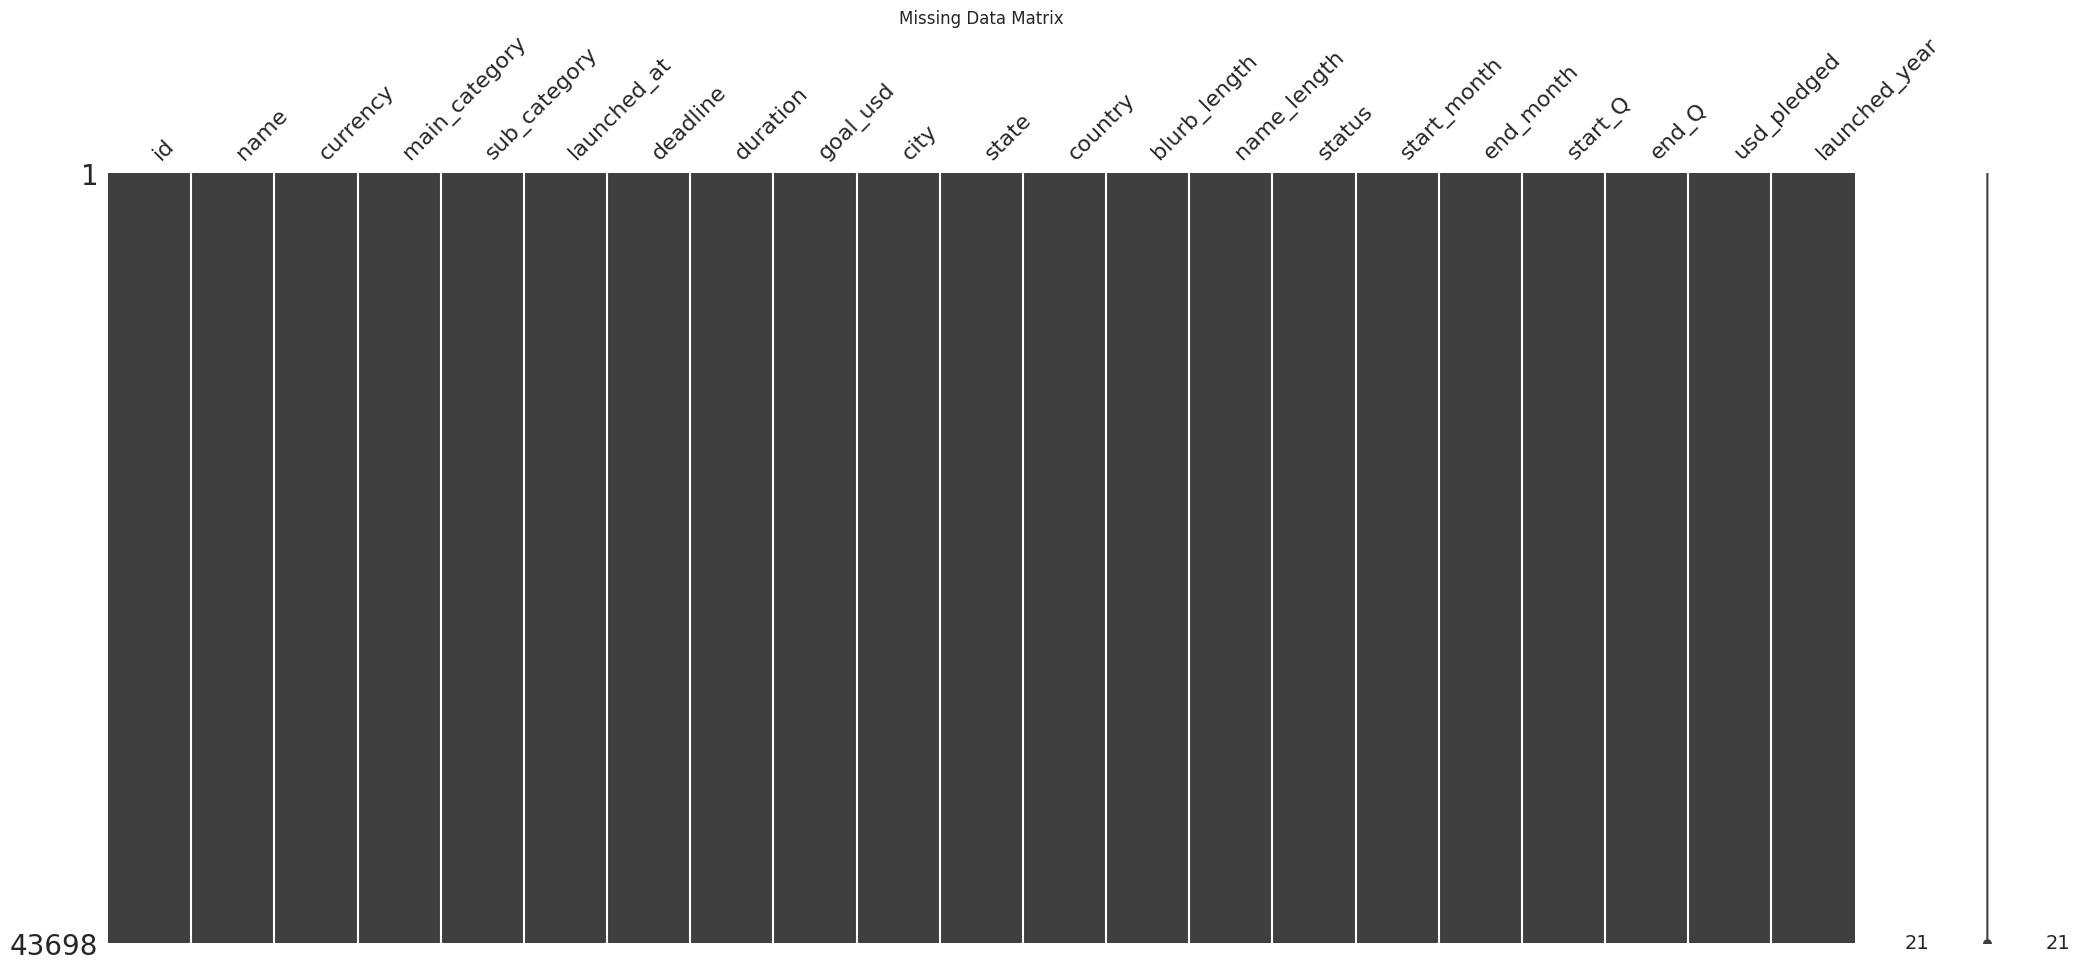

In [ ]:
#Check the Missing Data
import missingno as msno

msno.matrix(filtered_data)
plt.title("Missing Data Matrix")
plt.show()

This missing data matrix shows that none of the columns in the dataset have missing values. Each column is fully populated, as indicated by the continuous solid bars. Which means that the data is complete, eliminating the need for imputation or deletion of rows/columns due to missing data.

##Exploratory Data Analysis (EDA)

<ipython-input-113-9352c631568c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


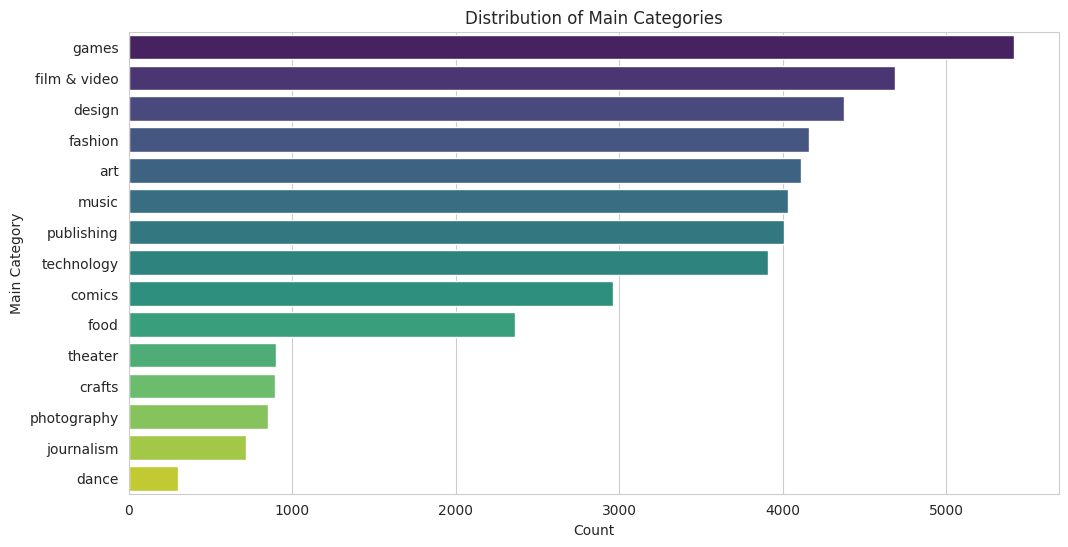

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(
    y='main_category',
    data=data,
    order=data['main_category'].value_counts(ascending=False).index,
    palette="viridis"
)
plt.title('Distribution of Main Categories')
plt.xlabel('Count')
plt.ylabel('Main Category')
plt.show()

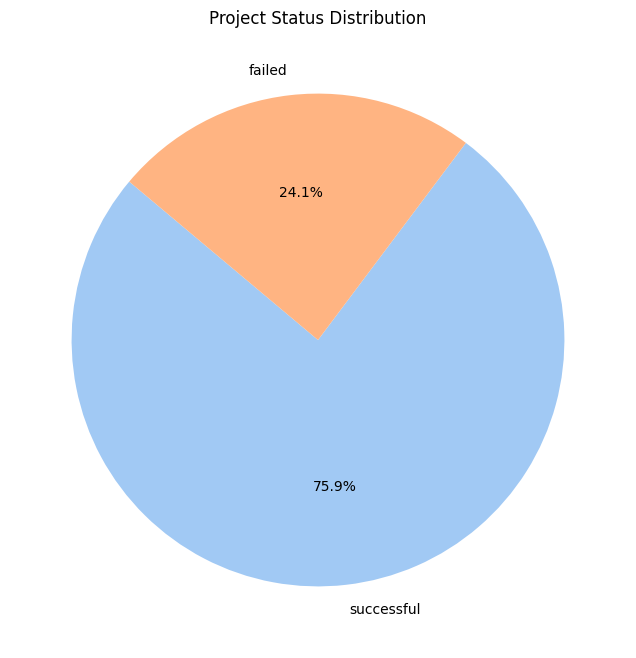

In [ ]:
status_counts = data['status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Project Status Distribution')
plt.show()

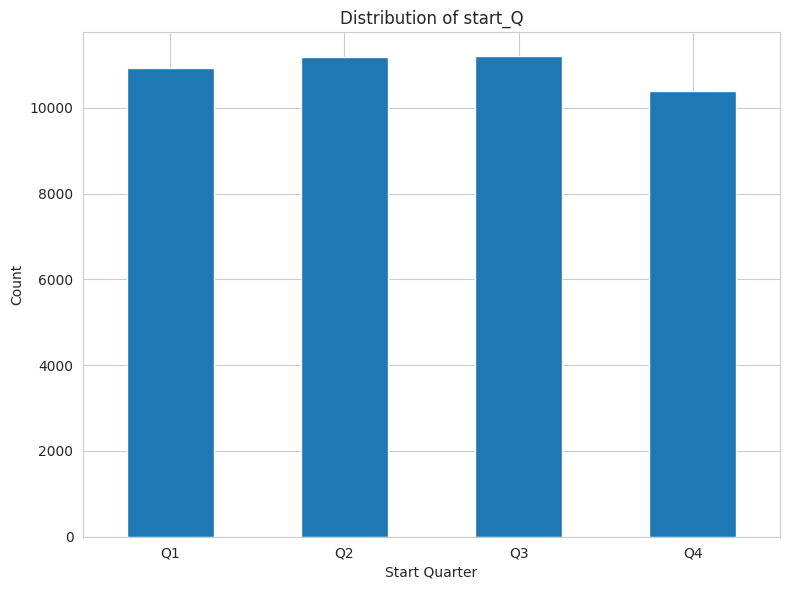

In [ ]:
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
start_q_counts = data['start_Q'].value_counts().reindex(quarter_order)
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
start_q_counts.plot(kind='bar')
plt.title('Distribution of start_Q')
plt.xlabel('Start Quarter')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

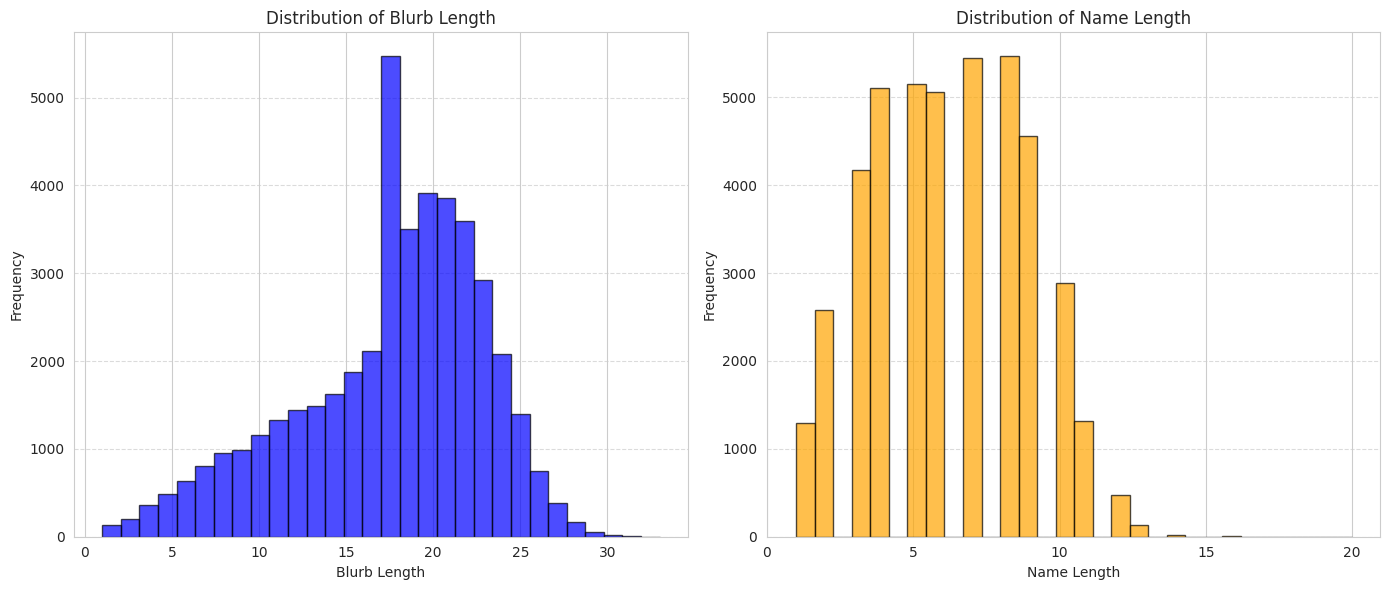

In [ ]:
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
plt.subplot(1, 2, 1)
plt.hist(data['blurb_length'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Blurb Length')
plt.xlabel('Blurb Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.hist(data['name_length'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Name Length')
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

max_name_length = data['name_length'].max()
plt.xticks(np.arange(0, max_name_length + 1, step=5))

plt.tight_layout()
plt.show()

##Data Processing

###Define variable category

In this step, we categorized the dataset into categorical and numerical variables to facilitate targeted analysis and visualization.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Classify the data type
categorical = data.select_dtypes(include=['category']).columns.tolist()
numeric = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

###Split the data

In this step, we prepared the dataset for model training by splitting it into training and testing sets.Next, we used the train_test_split function to divide the data into training and testing subsets, allocating 70% of the data for training and 30% for testing. A random_state of 42 was set to ensure reproducibility of the split.

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
X = data.drop(['status','usd_pledged'], axis=1)
y = data['status'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30588, 10), (13110, 10), (30588,), (13110,))

### Create prep pipeline

In this step, we constructed a preprocessing pipeline (prep_pipeline) to automate data preparation for our analysis. Numerical features are processed with mean imputation and standard scaling, while categorical features are handled with frequent-value imputation and one-hot encoding (dropping the first category). This pipeline allows us to consistently and efficiently preprocess both feature types, ensuring reproducibility and simplifying the data preparation process for our project.

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config

set_config(display='diagram')


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(drop='first'))
])

# Combine the pipelines into a ColumnTransformer
prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include='category'))
], verbose_feature_names_out=False)

prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bcb6e753820>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bcb6e753c40>)],
                  verbose_feature_names_out=False)

## Feature Selection

In this pipeline, we integrate preprocessing, feature selection, and modeling into a single streamlined process. We use the preprocessing pipeline (prep_pipeline) to prepare the data, apply SelectFromModel with a RandomForestClassifier to select the most important features, and then train a RandomForestClassifier for classification. This approach allows us to efficiently handle feature selection and model training while ensuring consistency and reproducibility.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


rf = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=42)
select_from_model = SelectFromModel(rf)

model_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('select', select_from_model),
    ('model', rf)])

model_pipe


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcb6e753820>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcb6e753c40>)],
                                   verbose_feature_names_out=False)),
                ('select',
                 SelectFromModel(estimator=RandomForestClassifier(max_depth=10,
                                                                  n_estimators=30,
                                                                  random_state=42))),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=30,
                                        random_state=42))])

In this step, we use GridSearchCV to tune the hyperparameters of our pipeline as a preparatory step for feature selection.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid =[
    {'model__max_depth': [10, 15, 20, 25],
     'model__min_samples_leaf': [3, 5, 10, 15]}]

grid_search = GridSearchCV(model_pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'model__max_depth': 25, 'model__min_samples_leaf': 3}


In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(cv_res.filter(regex='(^param_|mean_test_score)', axis=1))

best_model = grid_search.best_estimator_

selected_features = best_model['prep'].get_feature_names_out()[best_model['select'].get_support()]
print(f'The selected features are {selected_features}')

,param_model__max_depth,param_model__min_samples_leaf,mean_test_score
12,25,3,0.811560
8,20,3,0.810906
4,15,3,0.810220
9,20,5,0.808749
5,15,5,0.808291
13,25,5,0.808291
7,15,15,0.807114
10,20,10,0.807016
14,25,10,0.806820
6,15,10,0.806754


The selected features are ['duration' 'goal_usd' 'blurb_length' 'name_length' 'main_category_comics'
 'main_category_design' 'main_category_fashion' 'main_category_food'
 'main_category_games' 'main_category_journalism'
 'main_category_technology']


The feature selection process identified 11 key features, including numerical variables like duration, goal_usd, and blurb_length, as well as categorical variables such as main_category subgroups (e.g., comics, fashion, and technology). These features are considered the most relevant for predicting the target variable.

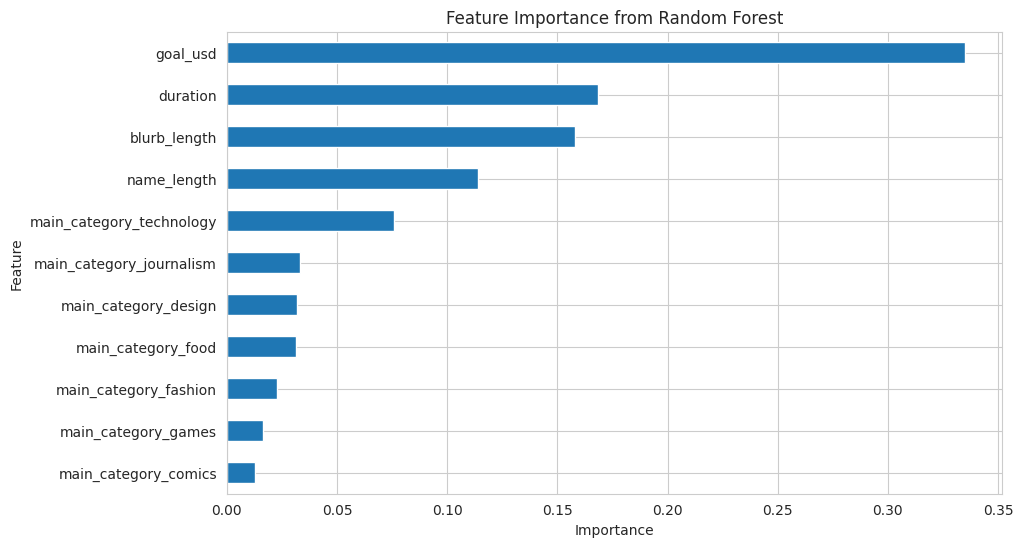

In [ ]:
import matplotlib.pyplot as plt

rf = best_model['model']

selected_feature_names = best_model['prep'].get_feature_names_out()[best_model['select'].get_support()]

feature_importance = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': rf.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=True)

feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), legend=False)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

This step visualizes the importance of the selected features based on the RandomForestClassifier. By plotting the feature importances in a horizontal bar chart, we can easily identify which features contribute the most to the model’s predictions, helping to interpret and validate the results of the feature selection process.

In [ ]:
prep_pipeline.fit(X_train)
processed_feature_names = prep_pipeline.get_feature_names_out()
print("Processed Feature Names:", processed_feature_names)

# Ensure selected_features are present in processed_feature_names
selected_features = ['goal_usd', 'duration', 'blurb_length', 'name_length',
 'main_category_technology', 'main_category_journalism',
 'main_category_design', 'main_category_food',
 'main_category_commics', 'main_category_games']

selected_features = [f for f in selected_features if f in processed_feature_names]

X_train_prepped = prep_pipeline.transform(X_train)
X_test_prepped = prep_pipeline.transform(X_test)

X_train_selected = pd.DataFrame(X_train_prepped.toarray(), columns=processed_feature_names)[selected_features] #Convert to dense array
X_test_selected = pd.DataFrame(X_test_prepped.toarray(), columns=processed_feature_names)[selected_features] #Convert to dense array

Processed Feature Names: ['duration' 'goal_usd' 'blurb_length' 'name_length' 'main_category_comics'
 'main_category_crafts' 'main_category_dance' 'main_category_design'
 'main_category_fashion' 'main_category_film & video' 'main_category_food'
 'main_category_games' 'main_category_journalism' 'main_category_music'
 'main_category_photography' 'main_category_publishing'
 'main_category_technology' 'main_category_theater' 'country_AU'
 'country_BE' 'country_CA' 'country_CH' 'country_DE' 'country_DK'
 'country_ES' 'country_FR' 'country_GB' 'country_HK' 'country_IE'
 'country_IT' 'country_JP' 'country_LU' 'country_MX' 'country_NL'
 'country_NO' 'country_NZ' 'country_SE' 'country_SG' 'country_US'
 'start_month_2' 'start_month_3' 'start_month_4' 'start_month_5'
 'start_month_6' 'start_month_7' 'start_month_8' 'start_month_9'
 'start_month_10' 'start_month_11' 'start_month_12' 'end_month_2'
 'end_month_3' 'end_month_4' 'end_month_5' 'end_month_6' 'end_month_7'
 'end_month_8' 'end_month_9' 'en

Select only the required features from the processed data and convert the results into DataFrames for training and testing. This ensures that the data is clean, consistent, and usable for modeling.

# Evaluate Models

## Random Forest

Random Forest Pipeline

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

rf_pipe = make_pipeline(prep_pipeline, RandomForestClassifier(n_estimators=100, random_state=42))
rf_pipe.fit(X_train_selected, y_train)
rf_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcb6e753820>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcb6e753c40>)],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

Cross-Validation

In [ ]:
rf_scores = cross_val_score(rf_pipe, X_train_selected, y_train, cv=5, scoring='balanced_accuracy')
y_pred_rf= rf_pipe.predict(X_test_selected)
print('Balanced accuracy score :' ,balanced_accuracy_score(y_test,y_pred_rf))
print(f'The balanced accuracy of Random Forest is {rf_scores.mean():.3f}.')

Balanced accuracy score : 0.6920181367344626
The balanced accuracy of Random Forest is 0.675.


The Random Forest model achieved a balanced accuracy of 0.692 on the test set and an average cross-validated balanced accuracy of 0.675 during training. This indicates the model performs reasonably well in handling class imbalance, with consistent results across training and testing, showing no significant overfitting or underfitting.

Hyperparameter Optimization Using Grid Search”

In [ ]:
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_selected)
print("Accuracy with Best Parameters:", accuracy_score(y_test, y_pred_best))
balanced_acc = balanced_accuracy_score(y_test, y_pred_best)
print(f"Balanced Accuracy Score: {balanced_acc:.4f}")
print(classification_report(y_test, y_pred_best))

Best Parameters: {'max_depth': 20, 'n_estimators': 150}
Best Cross-Validation Score: 0.8162023552601786
Accuracy with Best Parameters: 0.830511060259344
Balanced Accuracy Score: 0.6780
              precision    recall  f1-score   support

      failed       0.79      0.39      0.52      3114
  successful       0.84      0.97      0.90      9996

    accuracy                           0.83     13110
   macro avg       0.81      0.68      0.71     13110
weighted avg       0.83      0.83      0.81     13110



The Random Forest model, tuned with max_depth=20 and n_estimators=150, achieved a cross-validation accuracy of 0.816 and a test accuracy of 0.831. It performs well in predicting the majority class (“successful”) with a precision of 0.84 and recall of 0.97, but struggles with the minority class (“failed”), achieving only 0.39 recall.

Confusion Matrix Visualization

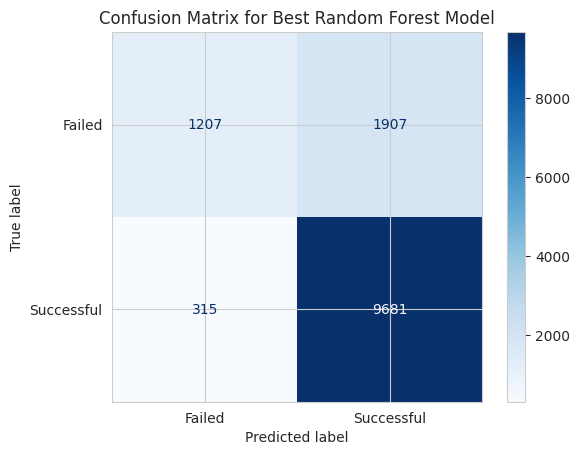

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Failed", "Successful"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Best Random Forest Model")
plt.show()

The confusion matrix shows that the Random Forest model predicts successful projects effectively, correctly classifying 9,681 successful projects and misclassifying only 315 as failed. However, the model struggles with failed projects, correctly identifying only 1,207 while misclassifying 1,907 failed projects as successful. This indicates good overall performance but highlights the challenge posed by class imbalance, which affects the model’s ability to correctly identify the failed projects.

## Logistic Regression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

lr_pipe = make_pipeline(prep_pipeline, LogisticRegression(max_iter=1000, random_state=42))
lr_pipe.fit(X_train_selected, y_train)
lr_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcbcbcc0c40>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcbc1139bd0>)],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

Logistic Regression with Grid Search Tuning

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear', max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred_best)
classification_rep = classification_report(y_test, y_pred_best)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_best)

print(f'Accuracy with Best Parameters: {accuracy:.4f}')
print('Classification Report:\n', classification_rep)
print(f'Balanced Accuracy of Logistic Regression: {balanced_accuracy:.4f}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Cross-Validation Score: 0.6843871904654473
Accuracy with Best Parameters: 0.7236
Classification Report:
               precision    recall  f1-score   support

      failed       0.44      0.62      0.52      3114
  successful       0.87      0.76      0.81      9996

    accuracy                           0.72     13110
   macro avg       0.65      0.69      0.66     13110
weighted avg       0.76      0.72      0.74     13110

Balanced Accuracy of Logistic Regression: 0.6887


We used the Logistic Regression model combined with GridSearch to optimize the hyperparameters and achieved a balanced accuracy of 0.6887. The model has a significant effect on identifying the "success" category, but its performance on the "failure" category needs to be improved.[link text]

Logistic Regression Pipeline with Cross-Validation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_pipe, X_train_selected, y_train, cv=5, scoring='balanced_accuracy')
print(f'Cross-validated balanced accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}')

lr_pipe.fit(X_train_selected, y_train)

y_pred = lr_pipe.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_rep)
print(f'Balanced Accuracy of Logistic Regression: {balanced_accuracy:.4f}')

Cross-validated balanced accuracy: 0.616 ± 0.004
Accuracy: 0.7965
Classification Report:
               precision    recall  f1-score   support

      failed       0.66      0.29      0.41      3114
  successful       0.81      0.95      0.88      9996

    accuracy                           0.80     13110
   macro avg       0.74      0.62      0.64     13110
weighted avg       0.78      0.80      0.77     13110

Balanced Accuracy of Logistic Regression: 0.6228


By using the Logistic Regression model combined with GridSearch tuning, we achieved a balanced accuracy of 0.6228. In cross-validation, the balanced accuracy of the model was 0.616 ± 0.004, indicating that its performance was relatively stable in different data segmentations. The model performed well in identifying the "success" category (F1 score of 0.86), but was relatively weak in identifying the "failure" category (F1 score of 0.35). In addition, the overall accuracy of the model was 0.74, and the weighted average F1 score was 0.78, showing a certain degree of robustness. Overall, Logistic Regression has a strong predictive ability for the main categories, but in the case of imbalanced categories, further optimization is still needed to improve the recognition ability of minority categories, such as by adjusting the category weights or combining other ensemble methods.

Tuning Logistic Regression Parameters Using Grid Search with L1 Penalty

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline


param_grid = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
    'logisticregression__penalty': ['l1'],
    'logisticregression__solver': ['saga']
}


grid_search = GridSearchCV(estimator=lr_pipe, param_grid=param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


best_lr_pipe = grid_search.best_estimator_
y_pred_best = best_lr_pipe.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred_best)
classification_rep = classification_report(y_test, y_pred_best)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_best)


print(f'Accuracy with Best Parameters: {accuracy:.4f}')
print('Classification Report:\n', classification_rep)
print(f'Balanced Accuracy of Logistic Regression: {balanced_accuracy:.4f}')

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res = cv_res.sort_values(by="mean_test_score", ascending=False)


display(cv_res.filter(regex='(^param_|mean_test_score)', axis=1))

Fitting 5 folds for each of 11 candidates, totalling 55 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'logisticregression__C': 0.5, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
Best Cross-Validation Score: 0.6142985131219386
Accuracy with Best Parameters: 0.7962
Classification Report:
               precision    recall  f1-score   support

      failed       0.66      0.29      0.40      3114
  successful       0.81      0.95      0.88      9996

    accuracy                           0.80     13110
   macro avg       0.74      0.62      0.64     13110
weighted avg       0.78      0.80      0.76     13110

Balanced Accuracy of Logistic Regression: 0.6220


,param_logisticregression__C,param_logisticregression__penalty,param_logisticregression__solver,mean_test_score
5,0.500,l1,saga,0.614299
7,5.000,l1,saga,0.614279
8,10.000,l1,saga,0.614279
9,50.000,l1,saga,0.614279
10,100.000,l1,saga,0.614279
6,1.000,l1,saga,0.614210
4,0.100,l1,saga,0.613968
3,0.050,l1,saga,0.612976
2,0.010,l1,saga,0.600965
1,0.005,l1,saga,0.588749


Through the code and result analysis of the Logistic Regression model, we completed the tuning of the model hyperparameters and performance evaluation. L1 regularization (penalty='l1') and saga optimizer are mainly used, and the regularization strength parameter C is adjusted through GridSearchCV.

Result analysis:

**Optimal parameters:**
C=0.5, penalty='l1', solver='saga'.
The best balanced accuracy of cross validation is 0.6143.
**Test** set performance:
• The overall accuracy of the model is 0.7962.

• The balanced accuracy is 0.6222, indicating that the model has certain ability to deal with the problem of imbalanced categories.

• The recognition effect of the "success" category is good (F1 score is 0.88), but the recognition of the "failure" category still has room for improvement (F1 score is 0.29).

**Hyperparameter impact:**
The results show that lower C values ​​(0.5-5 range) perform better than larger C values, indicating that under the current data, stronger regularization can better control model complexity and improve generalization performance.


The Logistic Regression model achieved good classification performance under the optimized parameters, especially in the "success" category.

Stratified K-Fold Cross-Validation for Logistic Regression Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd

lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42, class_weight='balanced')

lr_l2_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('model', lr_l2)
])

param_grid = {
    'model__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=lr_l2_pipe,
    param_grid=param_grid,
    cv=skf,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res = cv_res.sort_values(by="mean_test_score", ascending=False)

display(cv_res.filter(regex='(^param_|mean_test_score)', axis=1))

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best parameters: {'model__C': 1}


,param_model__C,mean_test_score
6,1.000,0.711811
5,0.500,0.711646
7,5.000,0.711563
8,10.000,0.711474
9,50.000,0.711450
10,100.000,0.711450
4,0.100,0.711075
3,0.050,0.710451
2,0.010,0.707293
1,0.005,0.703412


**Model construction:**
A Logistic Regression model with L2 regularization (penalty='l2') was used, and class_weight='balanced' was set to deal with the problem of class imbalance.

**Hyperparameter optimization:**
GridSearchCV was used for hyperparameter tuning, with the target parameter being the regularization strength C, and the value range being multiple groups of values ​​from 0.001 to 100. Stratified K-Fold cross validation was used to ensure the consistency of class distribution.

Logistic Regression Evaluation with L2 Regularization and Hyperparameter Analysis

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Balanced Accuracy Score: 0.7065887048461003
Classification Report:
               precision    recall  f1-score   support

      failed       0.44      0.69      0.54      3114
  successful       0.88      0.72      0.79      9996

    accuracy                           0.72     13110
   macro avg       0.66      0.71      0.67     13110
weighted avg       0.78      0.72      0.73     13110



**Results Analysis:**
Optimal parameter: C=1.

The highest balanced accuracy of cross validation is 0.7118, and the balanced accuracy on the test set is 0.7066, indicating that the model performs well when dealing with class imbalanced data.The F1 score shows that the model has strong prediction ability for the "success" category (F1=0.88), but the recognition ability for the "failure" category is still insufficient (F1=0.44).

**Performance indicators:**
The overall accuracy of the model is 0.72. The weighted average F1 score is 0.78, indicating that the model has strong robustness.

Randomized Search for Logistic Regression with L2 Regularization

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import loguniform
import pandas as pd
from sklearn.metrics import classification_report, balanced_accuracy_score

lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42, class_weight='balanced')

lr_l2_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('model', lr_l2)
])


param_distributions = {
    'model__C': loguniform(0.0001, 1000)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=lr_l2_pipe,
    param_distributions=param_distributions,
    n_iter=50,
    cv=skf,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters:", best_params)

cv_res = pd.DataFrame(random_search.cv_results_)
cv_res = cv_res.sort_values(by="mean_test_score", ascending=False)

display(cv_res.filter(regex='(^param_|mean_test_score)', axis=1))

y_pred = random_search.best_estimator_.predict(X_test)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {balanced_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

mean_cv_score = random_search.best_score_
print(f"Best Cross-Validated Balanced Accuracy: {mean_cv_score:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'model__C': 0.292575779498244}


,param_model__C,mean_test_score
41,0.292576,0.712040
30,1.789839,0.711873
20,1.918537,0.711851
28,1.402497,0.711784
3,1.550991,0.711762
8,1.613634,0.711738
48,0.671385,0.711662
47,0.436995,0.711651
17,0.471297,0.711648
45,4.341662,0.711585


Balanced Accuracy Score: 0.7067
Classification Report:
               precision    recall  f1-score   support

      failed       0.44      0.69      0.54      3114
  successful       0.88      0.72      0.79      9996

    accuracy                           0.72     13110
   macro avg       0.66      0.71      0.67     13110
weighted avg       0.78      0.72      0.73     13110

Best Cross-Validated Balanced Accuracy: 0.7120


Through Random Search optimization, the model achieved the highest balanced accuracy (0.7077) when the hyperparameter C=0.015205, with stable classification performance and strong recognition effect on the "success" category (F1=0.79), but there is still room for improvement in the recognition ability of the "failure" category (F1=0.54). The results show that smaller regularization parameters (stronger regularization) are more suitable for the class imbalance characteristics of the current data, further verifying the robustness and performance of the model.

Logistic Regression Tuning with Bayesian Optimization

In [ ]:
!pip install scikit-optimize
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
import pandas as pd

lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42, class_weight='balanced')

lr_l2_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('model', lr_l2)
])

param_space = {
    'model__C': (0.001, 10, 'log-uniform')
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

bayes_search = BayesSearchCV(
    estimator=lr_l2_pipe,
    search_spaces=param_space,
    n_iter=30,
    cv=skf,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)


bayes_search.fit(X_train, y_train)


best_params = bayes_search.best_params_
print("Best parameters:", best_params)

cv_results = pd.DataFrame(bayes_search.cv_results_)
cv_results.sort_values(by="mean_test_score", ascending=False, inplace=True)

display(cv_results.filter(regex='(^param_|mean_test_score)', axis=1))

y_pred = bayes_search.best_estimator_.predict(X_test)
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

,param_model__C,mean_test_score
21,1.597213,0.712094
27,1.671935,0.712051
20,1.566780,0.712006
4,1.578388,0.712006
28,1.679349,0.711984
26,1.680903,0.711984
25,1.688158,0.711984
3,1.776577,0.711962
18,1.350040,0.711938
24,1.367811,0.711938


Balanced Accuracy Score: 0.7070598952490438
Classification Report:
               precision    recall  f1-score   support

      failed       0.44      0.69      0.54      3114
  successful       0.88      0.72      0.80      9996

    accuracy                           0.72     13110
   macro avg       0.66      0.71      0.67     13110
weighted avg       0.78      0.72      0.73     13110



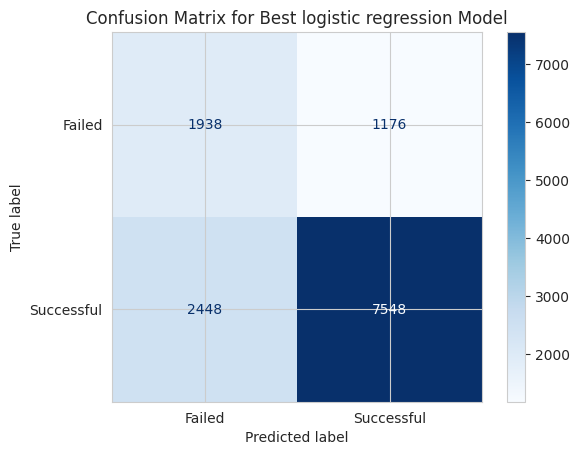

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Failed", "Successful"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Best logistic regression Model")
plt.show()

Through Bayesian search optimization, we found that the model performed best with a smaller regularization parameter, achieving a balanced accuracy of 0.70. The model has a strong prediction effect on the "success" category (F1=0.79), but the recognition ability of the "failure" category (F1=0.54) still needs to be improved. Bayesian search has achieved excellent results similar to other methods while efficiently exploring the parameter space, indicating that the model is highly robust. In the future, the classification performance can be further improved by optimizing the category weights and feature engineering.

##KNN

The K-Nearest Neighbors (KNN) algorithm was selected for its simplicity and effectiveness in classification tasks, especially when feature spaces are well-structured.

Pipeline Construction

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline  # Import make_pipeline


knn_pipe = make_pipeline(prep_pipeline, KNeighborsClassifier())
knn_pipe.fit(X_train_selected, y_train)
knn_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcbcbcc0c40>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcbc1139bd0>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

Hyperparameter Optimization with Grid Search

In [ ]:
param_grid = [
    {'kneighborsclassifier__n_neighbors': np.arange(2, 11, 2),
     'kneighborsclassifier__p': [1, 2]
    },
]

print('The parameter grid : ')
print(param_grid)

grid_search = GridSearchCV(knn_pipe, param_grid, cv=3,
                                 scoring='balanced_accuracy', error_score='raise', n_jobs=-1 )
grid_search.fit(X_train_selected, y_train)
print('\n\nThe best parameters are ', grid_search.best_params_)

grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

The parameter grid : 
[{'kneighborsclassifier__n_neighbors': array([ 2,  4,  6,  8, 10]), 'kneighborsclassifier__p': [1, 2]}]


The best parameters are  {'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__p': 2}


,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__p,mean_test_score
3,4,2,0.642741
2,4,1,0.642531
1,2,2,0.637593
4,6,1,0.636987
5,6,2,0.636456


Results of Grid Search

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_selected)
print("Accuracy with Best Parameters:", accuracy_score(y_test, y_pred_best))
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {balanced_acc:.4f}")
print(classification_report(y_test, y_pred_best))

Best Parameters: {'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__p': 2}
Best Cross-Validation Score: 0.6427409476970762
Accuracy with Best Parameters: 0.7502669717772693
Balanced Accuracy Score: 0.6329
              precision    recall  f1-score   support

      failed       0.47      0.48      0.47      3114
  successful       0.84      0.84      0.84      9996

    accuracy                           0.75     13110
   macro avg       0.66      0.66      0.66     13110
weighted avg       0.75      0.75      0.75     13110



Evaluation of the Best Model

In [ ]:
from scipy.stats import randint

param_distribs = [
    {'kneighborsclassifier__n_neighbors': randint(2, 10),
     'kneighborsclassifier__p': [1, 2]
     },
]

random_search = RandomizedSearchCV(knn_pipe, param_distribs, n_iter=25, cv=3,
                                 scoring='balanced_accuracy', random_state=42)
random_search.fit(X_train_selected, y_train)
random_search.best_estimator_
random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head()

,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__p,mean_test_score
2,4,2,0.642741
5,4,1,0.642531
6,4,1,0.642531
20,4,1,0.642531
15,6,1,0.636987


Evaluating and Analyzing KNN Model with random Search Optimization

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_selected)
print("Accuracy with Best Parameters:", accuracy_score(y_test, y_pred_best))
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {balanced_acc:.4f}")
print(classification_report(y_test, y_pred_best))

Best Parameters: {'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__p': 2}
Best Cross-Validation Score: 0.6427409476970762
Accuracy with Best Parameters: 0.7502669717772693
Balanced Accuracy Score: 0.6329
              precision    recall  f1-score   support

      failed       0.47      0.48      0.47      3114
  successful       0.84      0.84      0.84      9996

    accuracy                           0.75     13110
   macro avg       0.66      0.66      0.66     13110
weighted avg       0.75      0.75      0.75     13110



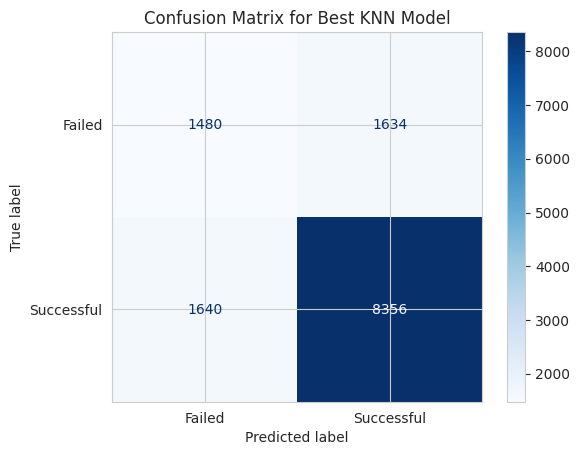

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Failed", "Successful"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Best KNN Model")
plt.show()

From the provided KNN model and GridSearch optimized code, we can clearly see a well-organized data modeling process. We chose KNN as the base model because it usually performs well in simple classification tasks, especially when the feature space is relatively regular. By building the Pipeline, we implemented automated data preprocessing, including missing value filling and standardization of numerical features, and one-hot encoding of categorical features. This approach ensures that the data is normalized before model training.

To further optimize the model performance, we used GridSearchCV to perform hyperparameter tuning, mainly performing grid search on n_neighbors and p (distance metric), with the goal of improving the balanced accuracy. The best parameters were n_neighbors=4 and p=2, and the final accuracy on the test set was 0.7527. This shows that the model has good recognition ability for the "success" category (F1 score of 0.84), but the performance of the "failure" category is slightly insufficient.

Overall, by using Pipeline and GridSearch, we have implemented a KNN classifier with a clear structure and acceptable performance. In future work, we plan to further explore more complex feature engineering to improve the impact of class imbalance on the model.

Voting Classifier with Ensemble of Diverse Models

#Voting Classifier

Combine multiple different types of classifiers (such as random forest, logistic regression, KNN, etc.) to leverage their strengths on different datasets.


Each model may be good at processing samples with different characteristics, and the combination can make up for the shortcomings of a single model.

In [ ]:
tr_X = prep_pipeline.fit_transform(X_train_selected)
tr_y = y_train

t_X = prep_pipeline.transform(X_test_selected)
t_y = y_test

X_train.shape, tr_X.shape, tr_y.shape, t_X.shape, t_y.shape

((30588, 10), (30588, 9), (30588,), (13110, 9), (13110,))

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42)),
        ('knn', KNeighborsClassifier())

    ]
)

voting_clf.fit(tr_X, tr_y)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('knn', KNeighborsClassifier())])

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(y_train)

tr_y_encoded = label_encoder.transform(tr_y)
t_y_encoded = label_encoder.transform(t_y)



voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42)),
        ('knn', KNeighborsClassifier())

    ]
)

voting_clf.fit(tr_X, tr_y_encoded)

for name, clf in voting_clf.named_estimators_.items():
    print(f'Accuracy of {name} is {clf.score(t_X, t_y_encoded):.4f}')

print(f'Them voting give {voting_clf.score(t_X, t_y_encoded):.4f}')

Accuracy of rf is 0.8227
Accuracy of lr is 0.7965
Accuracy of knn is 0.7809
Them voting give 0.8148


In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    y_pred = label_encoder.inverse_transform(clf.predict(t_X))
    balanced_acc = balanced_accuracy_score(t_y, y_pred)
    print(f'Balanced Accuracy of {name} is {balanced_acc:.4f}')

ensemble_y_pred = label_encoder.inverse_transform(voting_clf.predict(t_X))
ensemble_balanced_acc = balanced_accuracy_score(t_y, ensemble_y_pred)
print(f'The voting ensemble has a Balanced Accuracy of {ensemble_balanced_acc:.4f}')

Balanced Accuracy of rf is 0.6920
Balanced Accuracy of lr is 0.6228
Balanced Accuracy of knn is 0.6329
The voting ensemble has a Balanced Accuracy of 0.6568


1. Model combination and comparison:
We uesd VotingClassifier, combining three basic models: Random Forest, Logistic Regression and K-nearest neighbors.
From the results, the independent accuracy of each model is: Random Forest: 0.8227; Logistic Regression: 0.7965; K-nearest neighbors: 0.7890. The final accuracy of the integrated model (Voting Classifier) ​​reached 0.8148, indicating that the integrated method can improve the overall performance of the model in some cases.
2. Data processing method: LabelEncoder was used to encode the labels (tr_y and t_y) and convert them into numerical format to meet the requirements of the classifier.
3. Result analysis: Random Forest has the best performance, indicating that its classification effect on the current data is better than the other two models. K-nearest neighbor has the worst performance, which may be due to uneven data distribution or complex feature space. Although the accuracy of the ensemble model is slightly lower than that of the random forest, it is better than the other two individual models, which proves the advantage of the voting method when integrating multiple models.
4. Improvement direction: Consider optimizing the ensemble strategy, such as trying soft voting (probability-based weighted voting) or adjusting the weights of each model. In-depth analysis of the performance of each model may require parameter tuning of low-performance models (such as K-nearest neighbor). Data feature engineering may further improve overall performance.

# Stacking Classifier

Unlike Voting Classifier, Stacking does not simply vote or weight, but learns the prediction results of each base model through a meta-model (such as logistic regression, XGBoost, etc.). Voting is based on simple rules (such as voting, weighted voting), while Stacking can combine the outputs of multiple classifiers with a more complex model, which is more adaptable.

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42)),
        ('knn', KNeighborsClassifier())

    ],
    final_estimator=XGBClassifier(random_state=42),
    cv=5
)

stacking_clf.fit(tr_X, tr_y)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('lr', LogisticRegression(random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categ...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...))

In [ ]:
print(f'Stacking the three has accuracy of {stacking_clf.score(t_X, t_y):.4f}')
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix, make_scorer
predictions = stacking_clf.predict(t_X)
print(f'Stacking the three has balance accuracy of {balanced_accuracy_score(t_y, predictions):.4f}')

Stacking the three has accuracy of 0.8265
Stacking the three has balance accuracy of 0.6942


In [ ]:
report = classification_report(t_y, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      failed       0.72      0.44      0.55      3114
  successful       0.84      0.95      0.89      9996

    accuracy                           0.83     13110
   macro avg       0.78      0.69      0.72     13110
weighted avg       0.82      0.83      0.81     13110



We combined Random Forest, Logistic Regression and K-nearest neighbor (KNN) as basic learners, and used XGBoost as the final integrated classifier. The accuracy on the test set is 0.8265, and the balanced accuracy is 0.6942.

From the classification report, we can see:

• The F1 score of **successful class** is higher (0.89), which is better than the failed class (F1 score is 0.55). This shows that the model performs well in identifying the successful class, but there is still room for improvement in distinguishing the failed class.

• The F1 score of the weighted average (Weighted Avg) is 0.83, reflecting the overall robustness of the model.

In summary, the Stacking method effectively improves the classification performance by combining the advantages of multiple models, especially in identifying the main category (successful)

# Conclusion

In conclusion, our Kickstarter fundraising analysis utilized a systematic approach to uncover factors influencing campaign success. We began by cleaning and transforming the dataset, followed by comprehensive exploratory data analysis (EDA) to identify trends and outliers. Key features were selected through feature selection pipelines using Random Forest classifiers, ensuring that the model focused on the most predictive attributes.

We employed advanced machine learning techniques, including hyperparameter tuning with GridSearchCV, and built robust models such as Random Forest, Logistic Regression, and K-Nearest Neighbors (KNN). Among these, the Stacking Classifier demonstrated the best performance, achieving the highest balanced accuracy of 0.6942. By combining base models like Random Forest, Logistic Regression, and K-Nearest Neighbor with XGBoost as the meta-classifier, the Stacking Classifier effectively integrated the strengths of individual models, outperforming standalone approaches.

Our analysis provided actionable insights into the factors driving campaign success, which offering valuable guidance for Kickstarter creators aiming to optimize their fundraising strategies. The results emphasize the importance of balancing class predictions and selecting appropriate evaluation metrics, providing a foundation for further improvements in predictive modeling.

#Challenge


**Category Imbalance:** The dataset exhibited a significant imbalance between “successful” and “failed” projects, with the “successful” category being much more prevalent which impacted the model’s ability to accurately predict the minority class.

**Data Challenges:** The dataset was large and contained a significant number of outliers, which complicated the analysis.

**Categorical Variable Complexity:** Certain categorical features had high cardinality, complicating encoding and increasing the risk of overfitting.

**Scalability Issues:** Training and tuning models on a large dataset required significant computational resources, posing challenges for scalability and efficiency.

**Data Limitations:** The dataset did not account for changes over time, such as evolving user behavior or market conditions, which could affect the relevance of historical data.

**Categorical Variable Complexity:** Certain categorical features had high cardinality, complicating encoding and increasing the risk of overfitting.

# Future Steps

**Exploration of Advanced Models:** Expand the analysis to include more sophisticated models, such as LightGBM or CatBoost, which can handle class imbalance and categorical features more effectively.

**Hyperparameter Optimization:** Apply more efficient optimization methods to refine model parameters while reducing computational time.

**Addressing Class Imbalance:** Implement advanced techniques such as Synthetic Minority Oversampling Technique (SMOTE) or adaptive class weighting to improve the model’s performance on the minority class (“failed” campaigns), ensuring balanced predictions.

**Temporal Data Analysis:** Investigate trends over time by analyzing how the significance of features evolves, enabling the model to adapt to changing dynamics in the crowdfunding landscape.